# K Nearest Neighbors - Regression

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph. There are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice.

In [42]:

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
car_data=pd.read_csv(r"E:\AI\data _sets\audi.csv")

In [44]:
car_data.shape

(10668, 9)

In [45]:
car_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [46]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10668.0,2017.100675,2.167494,1997.0,2016.00,2017.0,2019.0,2020.0
price,10668.0,22896.685039,11714.841888,1490.0,15130.75,20200.0,27990.0,145000.0
mileage,10668.0,24827.244001,23505.257205,1.0,5968.75,19000.0,36464.5,323000.0
tax,10668.0,126.011436,67.170294,0.0,125.00,145.0,145.0,580.0
mpg,10668.0,50.770022,12.949782,18.9,40.90,49.6,58.9,188.3
engineSize,10668.0,1.930709,0.602957,0.0,1.50,2.0,2.0,6.3


In [47]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [48]:
car_data['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [49]:
car_data['fuelType'].unique()
car_data['fuelType'].replace('Petrol',0,inplace=True)
car_data['fuelType'].replace('Diesel',1,inplace=True)
car_data['fuelType'].replace('Hybrid',2,inplace=True)
car_data['fuelType'].replace('Other',3,inplace=True)

In [50]:
car_data['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [51]:
car_data['transmission'].replace('Manual',0,inplace=True)

In [52]:
car_data['transmission'].replace('Automatic',1,inplace=True)

In [54]:
car_data['transmission'].replace('Semi-Auto',1,inplace=True)

In [55]:
car_data['transmission'] = car_data['transmission'].astype(int)

In [56]:
car_data.describe()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,0.590457,24827.244001,0.528028,126.011436,50.770022,1.930709
std,2.167494,11714.841888,0.491772,23505.257205,0.504468,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,0.000000,1.000000,0.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,0.000000,5968.750000,0.000000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,1.000000,19000.000000,1.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,1.000000,36464.500000,1.000000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,1.000000,323000.000000,2.000000,580.000000,188.300000,6.300000


In [57]:
continuous_numeric = [ 'year', 'mileage','tax','transmission','fuelType','mpg','engineSize','price']

numeric_cars = car_data[continuous_numeric].copy()
numeric_cars.head()

,year,mileage,tax,transmission,fuelType,mpg,engineSize,price
0,2017,15735,150,0,0,55.4,1.4,12500
1,2016,36203,20,1,1,64.2,2.0,16500
2,2016,29946,30,0,0,55.4,1.4,11000
3,2017,25952,145,1,1,67.3,2.0,16800
4,2019,1998,145,0,0,49.6,1.0,17300


In [58]:
numeric_cars.isnull().sum()

year            0
mileage         0
tax             0
transmission    0
fuelType        0
mpg             0
engineSize      0
price           0
dtype: int64

In [59]:
numeric_cars.dtypes

year              int64
mileage           int64
tax               int64
transmission      int32
fuelType          int64
mpg             float64
engineSize      float64
price             int64
dtype: object

The k-nearest neighbors algorithm uses the euclidean distance to determine the closest neighbor.

image.png

Where q and p represent two rows and the subscript representing a column. However, each column have different scaling. For example, if we take row 2, and row 3. The price has a difference of 1650, while the difference in mileage is 21,609. The algorithm will give extra weight towards the difference in Mileage.

That is why it is important to normalize the dataset into a unit vector. After normalization we'll have values from -1 to 1.

Statistically, normalization is given asimage.png

where df is any dataframe

In [60]:
normalized_cars = (numeric_cars - numeric_cars.mean())/(numeric_cars.max()-numeric_cars.min())
normalized_cars['price'] = numeric_cars['price']
normalized_cars.head()

,year,mileage,tax,transmission,fuelType,mpg,engineSize,price
0,-0.004377,-0.028149,0.041360,-0.590457,-0.264014,0.027332,-0.084239,12500
1,-0.047855,0.035219,-0.182778,0.409543,0.235986,0.079280,0.010999,16500
2,-0.047855,0.015848,-0.165537,-0.590457,-0.264014,0.027332,-0.084239,11000
3,-0.004377,0.003482,0.032739,0.409543,0.235986,0.097580,0.010999,16800
4,0.082579,-0.070679,0.032739,-0.590457,-0.264014,-0.006907,-0.147732,17300


In [61]:
def knn_train_test_uni(feature, target_column, df, k):
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    

    # Split the dataset
    train_set = rand_df.iloc[0:int(len(rand_df)/2)]
    test_set = rand_df.iloc[int(len(rand_df)/2):]
    
    # Train
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[[feature]], train_set[target_column])

    
    # Predict
    predictions = knn.predict(test_set[[feature]])
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_set[target_column], predictions))

    
    return rmse

In [62]:
from sklearn import metrics
feature = normalized_cars.columns.drop('price')
k_values = [1, 3, 5, 7, 9, 15]
K_v = 2
rmse_uni = {}
current_rmse = []
target_column = 'price'

for feature in continuous_numeric[0:-1]:
    for k in k_values:
        current_rmse.append(knn_train_test_uni(feature, target_column, normalized_cars, k))
        
    rmse_uni[feature] = current_rmse
    current_rmse = []                  
rmse_uni

{'year': [11556.89829608692,
  11344.51395365374,
  9420.772721188107,
  9425.723099405213,
  9463.23292473395,
  9193.157678961586],
 'mileage': [11971.910588972682,
  11178.655244144971,
  10304.547575792438,
  9939.557268353066,
  9824.805513352101,
  9733.853209137533],
 'tax': [12411.13418325852,
  10403.059073209062,
  10774.163886819824,
  10568.656033068382,
  10074.422399300312,
  9936.678205896109],
 'transmission': [12294.092165529779,
  11269.960859403494,
  11235.310023022545,
  11201.514875242854,
  10754.576506624187,
  10475.489677344403],
 'fuelType': [12010.049988851864,
  11785.577888163118,
  12507.651200978817,
  12049.89308541203,
  11945.382731131911,
  11840.579591103462],
 'mpg': [9429.651737876527,
  7806.796392555858,
  7582.086659564989,
  7441.6527654119855,
  7426.735920242204,
  7394.448294295776],
 'engineSize': [11986.317225459989,
  10121.108035879928,
  8866.751354269934,
  8725.719084462336,
  8612.374263223524,
  8479.272265330053]}

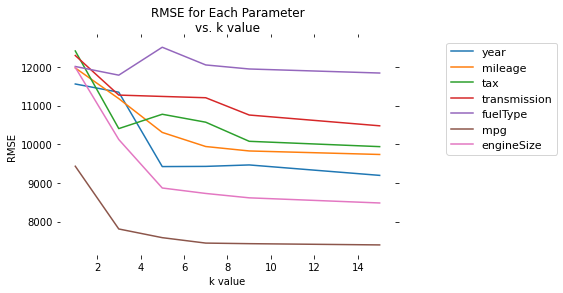

In [63]:
fig, ax = plt.subplots(1)

for key, values in rmse_uni.items():
    ax.plot(k_values, values, label=key)
    ax.set_xlabel('k value')
    ax.set_ylabel('RMSE')
    ax.set_title('RMSE for Each Parameter\nvs. k value')
    ax.tick_params(top="off", left="off", right="off", bottom='off')
    ax.legend(bbox_to_anchor=(1.5, 1), prop={'size': 11})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


Here the rmse ranges from 8000 to 12000 dollars



In [65]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics

y= normalized_cars.price
X= normalized_cars.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

#to store rmse values for different k
rmse_val2 = [] 
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    #fit the model
    model.fit(X_train, y_train)  
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

   
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))


(5334, 7) (5334,)
(5334, 7) (5334,)
RMSE value for k=  1 is: 3585.769928263691
RMSE value for k=  2 is: 3311.151260477242
RMSE value for k=  3 is: 3281.7991501329125
RMSE value for k=  4 is: 3202.9076568575574
RMSE value for k=  5 is: 3181.9971604510997
RMSE value for k=  6 is: 3203.79303417064
RMSE value for k=  7 is: 3222.063468613869
RMSE value for k=  8 is: 3239.862179965216
RMSE value for k=  9 is: 3280.692143167937
RMSE value for k=  10 is: 3329.1336745056938
RMSE value for k=  11 is: 3377.240413823628
RMSE value for k=  12 is: 3395.132182988426
RMSE value for k=  13 is: 3431.113194344596
RMSE value for k=  14 is: 3469.900367553671
RMSE value for k=  15 is: 3510.9552644290743
Mean Absolute Error: 2181.74
Mean Squared Error: 12326806.87
Root Mean Squared Error: 3510.96


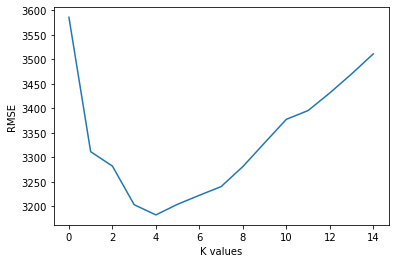

In [66]:
#plotting the rmse values against k values
import matplotlib.pyplot as plt
plt.plot(rmse_val2)
plt.ylabel('RMSE')
plt.xlabel('K values')
plt.show()